In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import astropy.units as units
import pandas as pd
import lightkurve as lk

In [127]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.05]
teff = [4750, 100]
bp_rp = [1.34, 0.1]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=1).download().PDCSAP_FLUX.normalize().flatten(window_length=401)
for q in range(2,17):
    lc = lc.append(lk.search_lightcurvefile(kic, quarter=q).download().PDCSAP_FLUX.normalize().flatten(window_length=401))


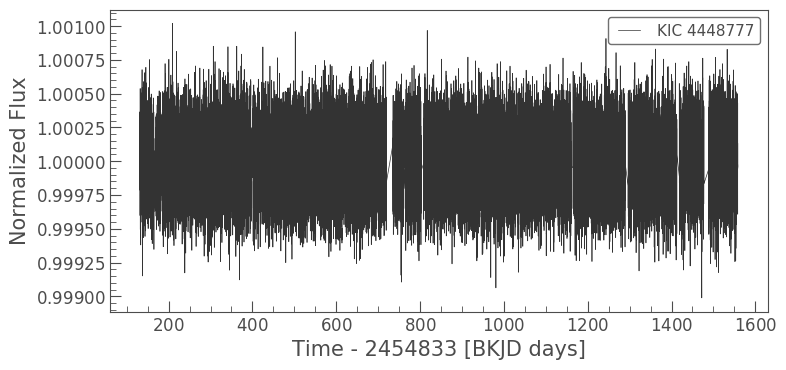

In [4]:
lc = lc.remove_outliers()
lc.plot()

In [5]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0).flatten()

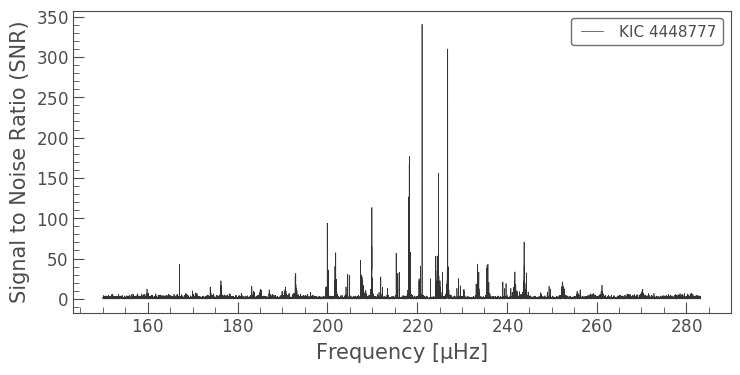

In [6]:
pg.plot()

In [128]:
ep = pb.epsilon()
result = ep(dnu=dnu, numax=numax, teff=teff, bp_rp=bp_rp, bw_fac=1.0)

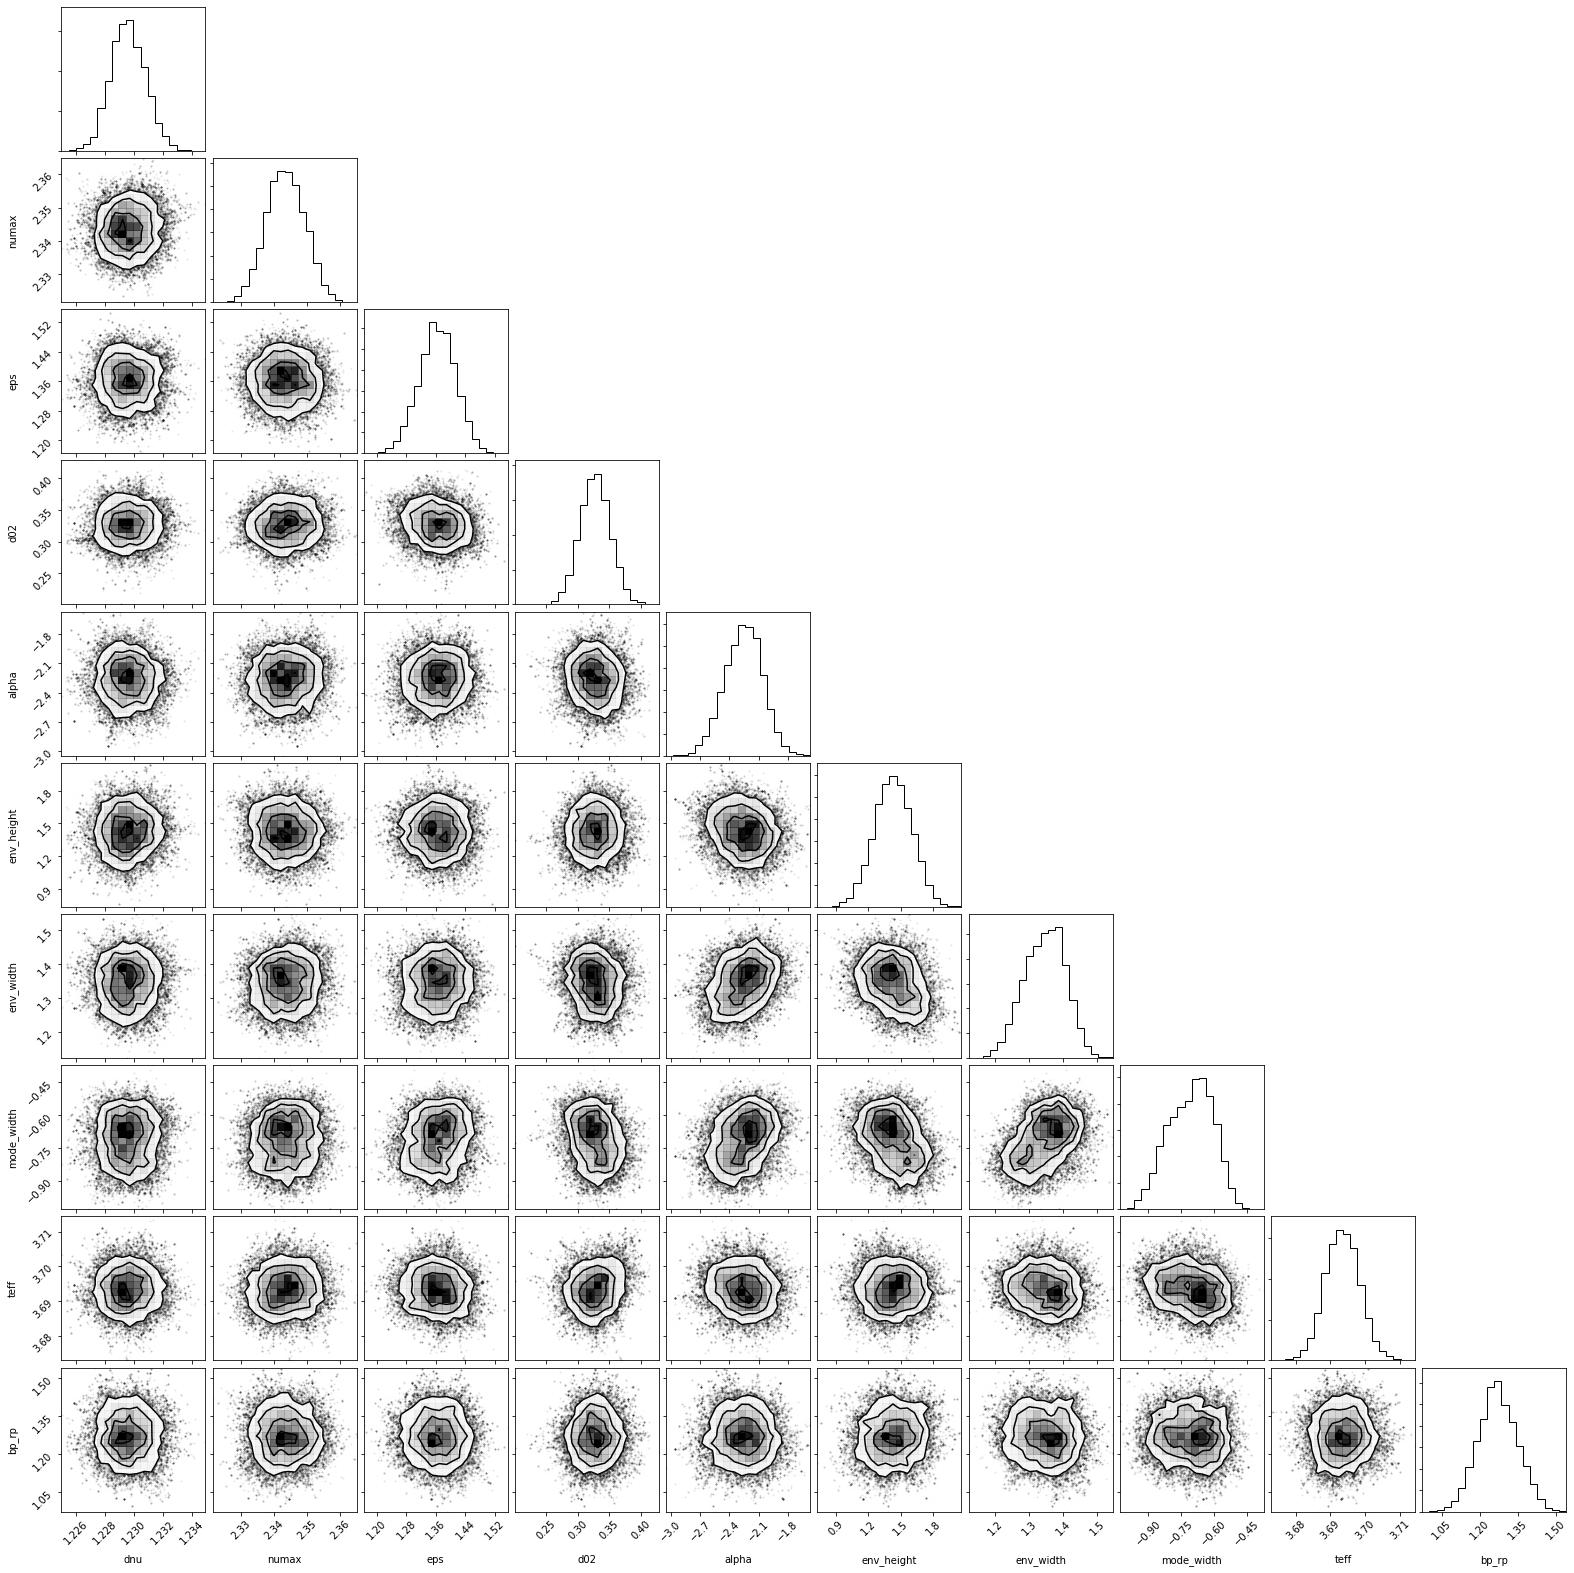

In [129]:
import corner
corner.corner(ep.samples, labels=ep.cols);

[ 1.22958932  2.34349743  1.36356952  0.32681452 -2.25727443  1.42600521
  1.34525582 -0.70719437  3.69342298  1.27128439]
15.167918651585012


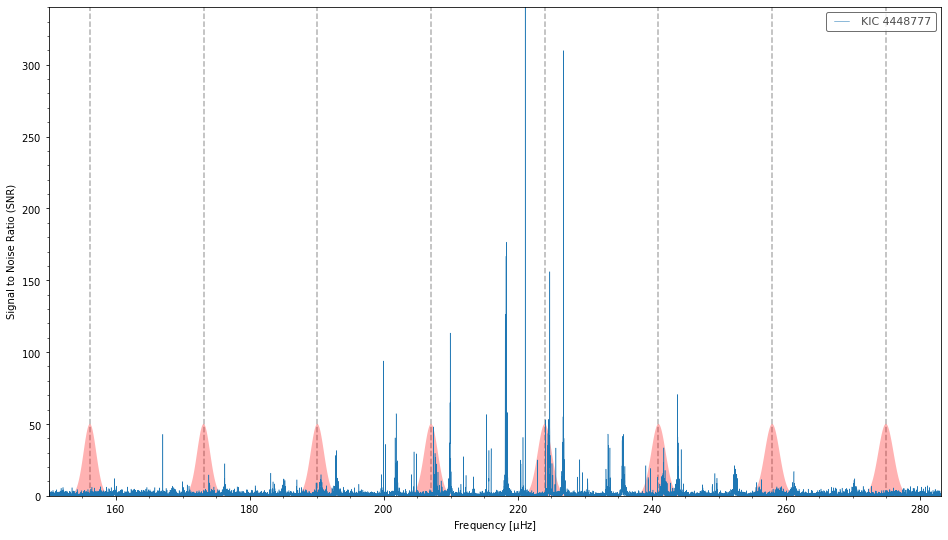

In [130]:
ep.plot(pg, h=50)
print(ep.samples.mean(axis=0))
print(np.log(ep.kde.pdf(ep.samples.mean(axis=0))))


In [131]:
import importlib
importlib.reload(pb.asy_peakbag)
asy = pb.asy_peakbag.asymptotic_fit(pg.frequency.value, pg.power.value, 
                                    ep.samples, 
                                    teff, bp_rp, 
                                    nthreads=4, norders=5,
                                    store_chains=True)

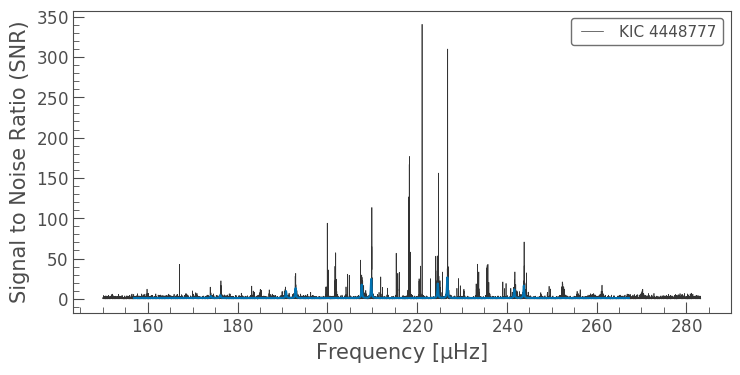

In [132]:
ax = pg.plot()
ax.plot(asy.model.f, asy.model(asy.start))

In [133]:
asy.run(burnin=3000, niter=1000)

[1.11266886e-04 1.04558085e-04 1.01312480e-04 1.21775395e-04
 9.60303617e-05 9.48338764e-05 8.50733909e-05 8.66060779e-05
 9.04623057e-05 8.33326529e-05]
[6.55446902e-01 9.65573111e+00 4.49378430e-02 1.69092974e-01
 3.85568164e-03 1.86601198e-01 5.56598333e-02 1.01544299e-01
 5.49830283e+01 7.38795242e-02]
[1.05662263e-02 1.21851711e+00 8.31220742e-03 1.10149458e-02
 4.07155321e-04 4.56580084e-02 1.84773741e-02 2.57094467e-02
 5.15157927e+01 7.57231536e-02]


,ell,nu_med,nu_mad
0,2,173.990235,0.018178
1,0,176.208974,0.016972
2,2,190.767938,0.012536
3,0,192.986269,0.009824
4,2,207.645981,0.012258
5,0,209.864245,0.009117
6,2,224.624016,0.010812
7,0,226.842211,0.008296
8,2,241.701809,0.014446
9,0,243.920395,0.013447


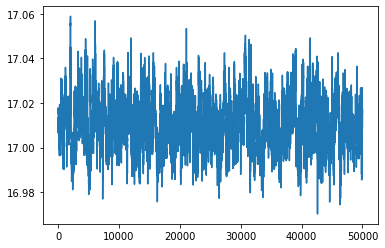

In [134]:
plt.plot(asy.flatchain[:,0 ])

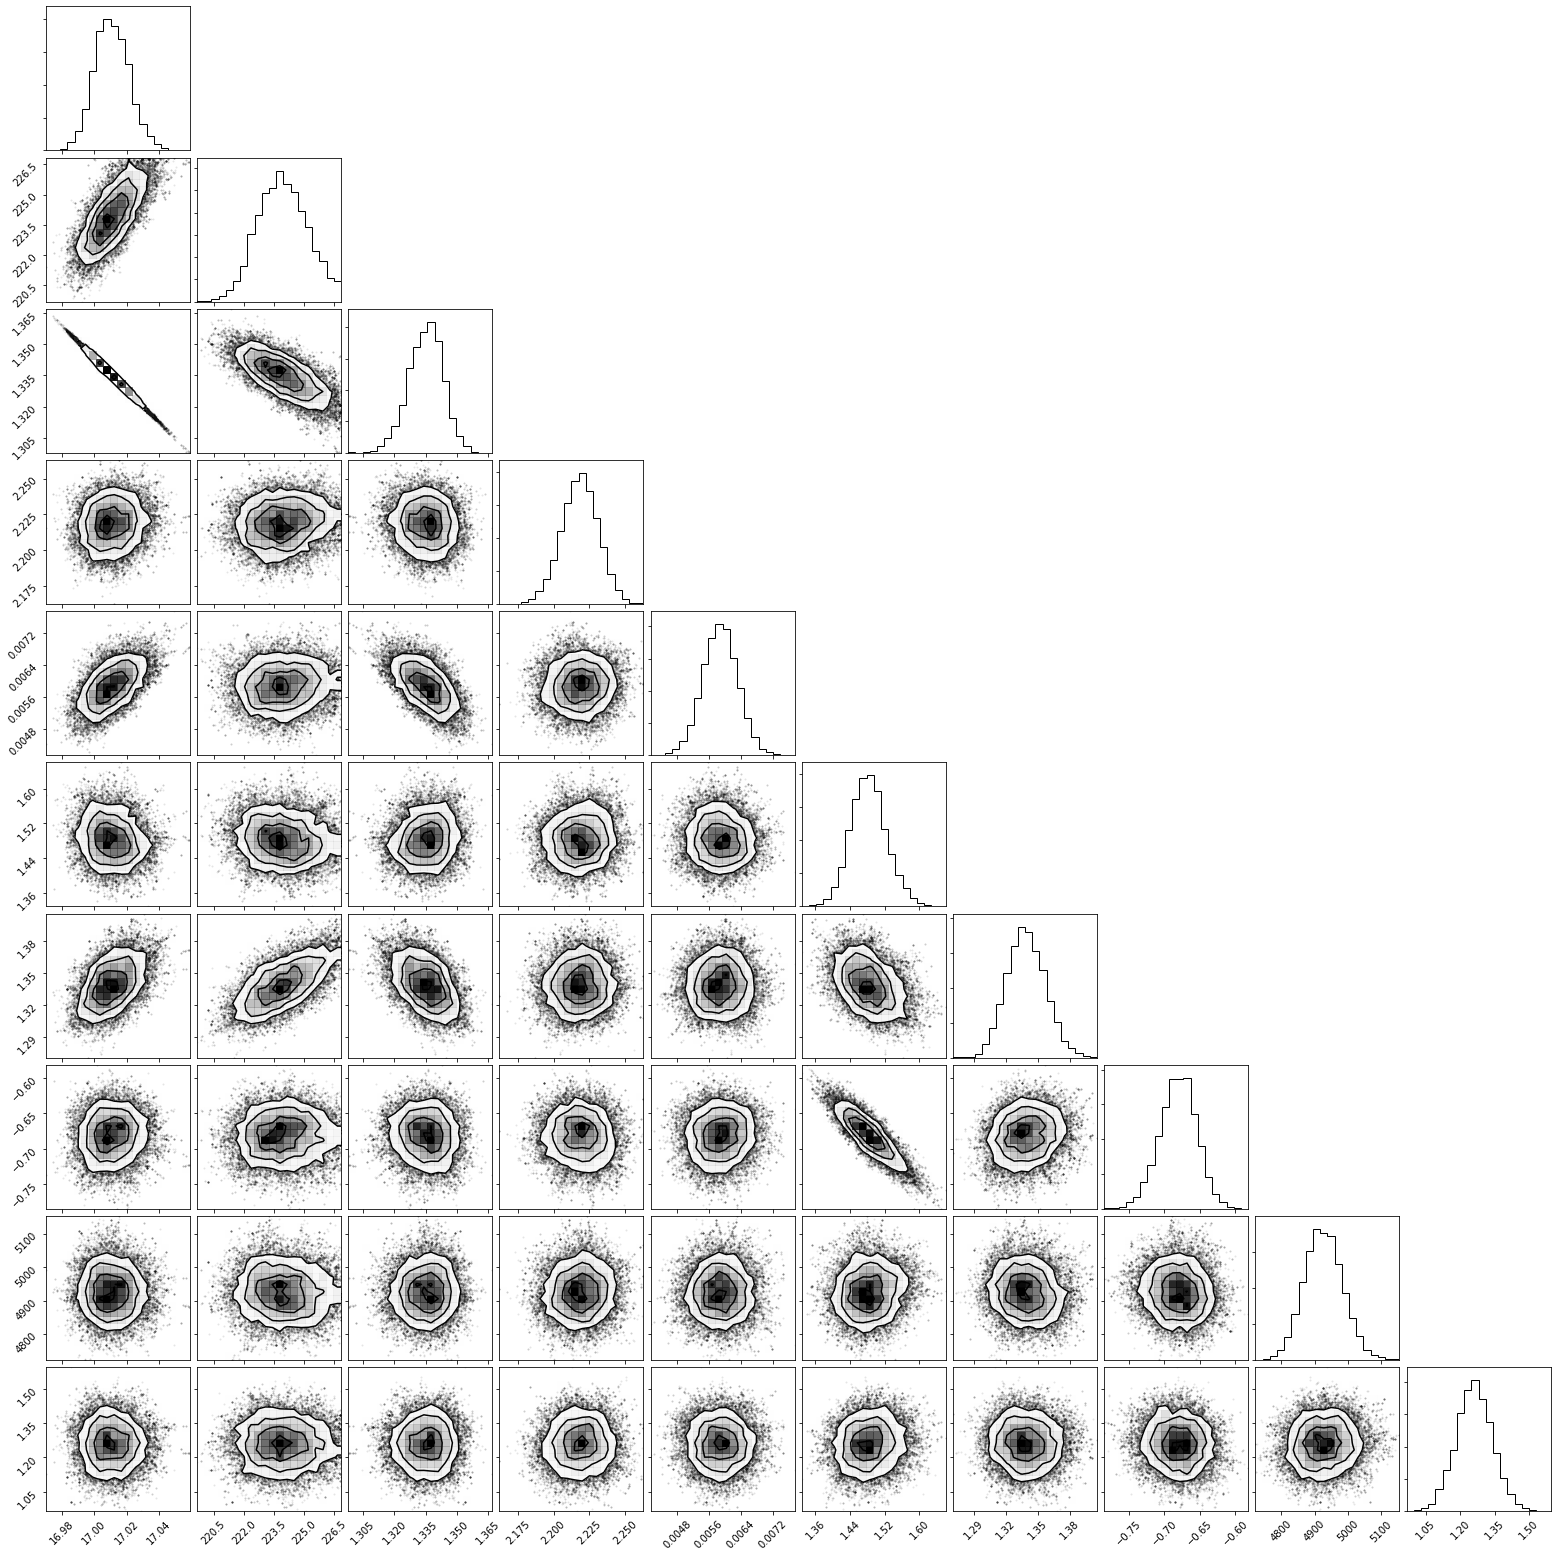

In [135]:
corner.corner(asy.flatchain);

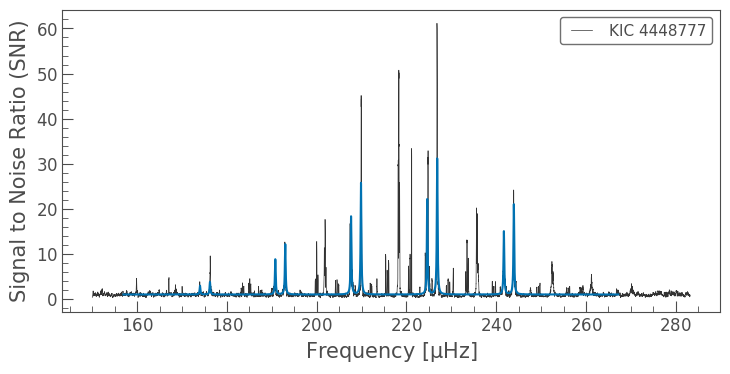

In [137]:
ax = pg.smooth().plot()
ax.plot(asy.model.f, asy.model(asy.flatchain.mean(axis=0)))

In [15]:
jam_sess = session(ID = kic, numax = numax, dnu = dnu, teff = teff, bp_rp = bp_rp, 
                   nthreads=1, use_cached=True, store_chains = True)

In [16]:
# Result is always a list of star class instances
# Taking the first one as an example
star = jam_sess.stars[0]

In [17]:
star.asymptotic_modeid(norders = 7)

TypeError: __init__() got multiple values for argument 'store_chains'

In [ ]:
print(star.asy_result.modeID)

In [ ]:
fig = star.plot_asyfit()
fig = star.corner()

In [ ]:
star.record('./')